In [15]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [16]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import foldnorm
x = np.linspace(2e-5, 5e0, 5)

noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

In [17]:

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/mse_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surfaces_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surfaces_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surfaces_pred_energy_var.pt").detach().flatten().numpy()

z_test_signed = test_energy-test_pred_energy
z_surface_signed = surface_energy-surface_pred_energy

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

In [18]:
import matplotlib
import random 
import ase.io

In [19]:
# get the indices of the structures that are part of the PIMD set -> if CONVERTED_ID > 999 then it is a PIMD structure:

frames_water_train = ase.io.read("../../Atomistic_experiments/data/H2O/train_frames.xyz", ":" )
frames_water_val = ase.io.read("../../Atomistic_experiments/data/H2O/validation_frames.xyz", ":" )
frames_water_test = ase.io.read("../../Atomistic_experiments/data/H2O/test_frames.xyz", ":" )

ID_test = np.array([int(frame.info["CONVERTED_ID"]) for frame in frames_water_test])
ID_PIMD = ID_test>999
ID_FPS = ID_test<1000

/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_12068/3479347359.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_12068/3479347359.py:123: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)


<Figure size 1920x1440 with 0 Axes>

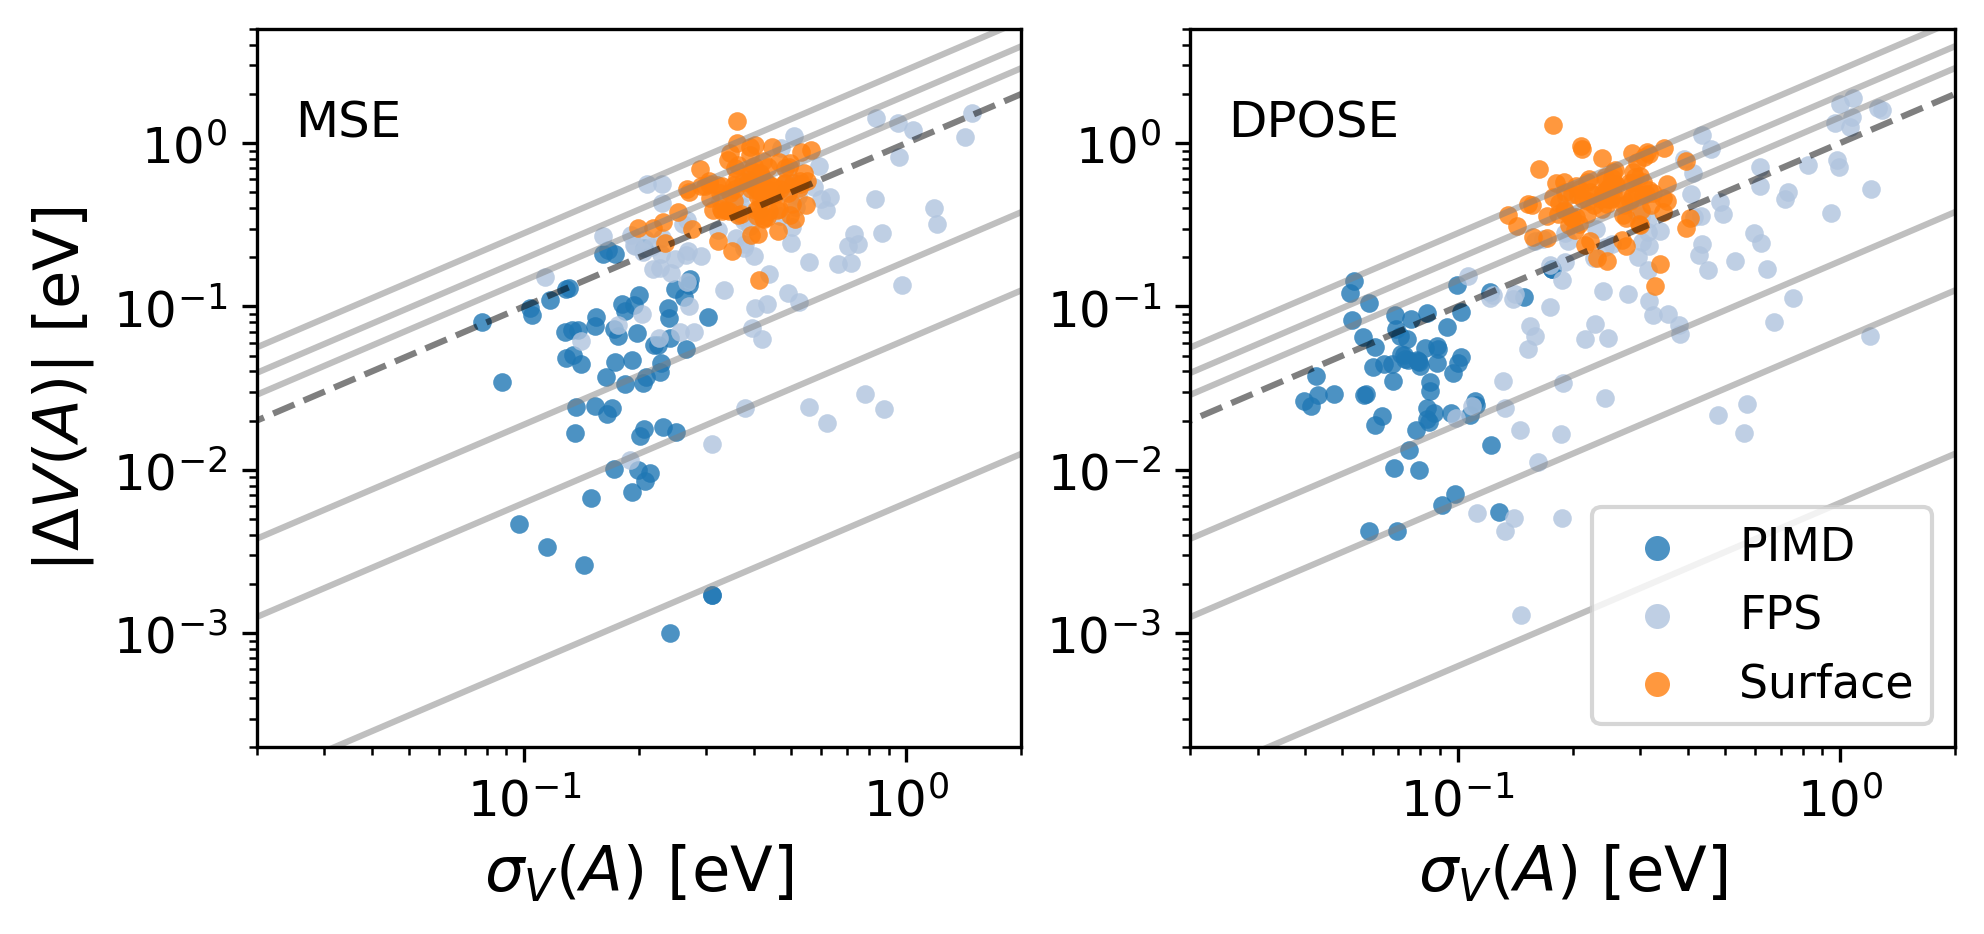

In [22]:
plt.figure(dpi=300)
LINESTYLE_UNIT = "--"
COLOR_UNIT = "black"
SCATTER_SIZE = 20.
OPACITY_SCATTER = 0.8
plt.rc('axes', labelsize=13.5)
plt.rcParams.update({'font.size': 11.0})
matplotlib.rc('xtick', labelsize=12.0) 
matplotlib.rc('ytick', labelsize=12.0) 
plt.rc('axes', labelsize=15.)


fig, axs = plt.subplots(1, 2, figsize=(6.5, 3),dpi=300,constrained_layout=True,)

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/mse_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surfaces_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surfaces_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surfaces_pred_energy_var.pt").detach().flatten().numpy()

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

z_surface = np.abs(surface_energy-surface_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)


"""

axs[1].plot([0., max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
plt.plot([0., -max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
#plt.axhline(y=max_50, color="black")
plt.scatter( z_test_signed, np.sqrt(alpha_2*test_pred_energy_var), label="bulk")
plt.scatter( z_surface_signed, np.sqrt(alpha_2*surface_pred_energy_var), label="surface")
plt.axvline(x=0.0, color="black")
"""

axs[0].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_PIMD], z_test[ID_PIMD], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, linewidth=0., color="tab:blue",)
axs[0].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_FPS], z_test[ID_FPS], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, linewidth=0., color="lightsteelblue",)
axs[0].scatter(np.sqrt(alpha_2*surface_pred_energy_var), z_surface, rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, linewidth=0., color="tab:orange",)

axs[0].plot(x, quantiles_upper_05, color='gray', alpha=0.5)
axs[0].plot(x, quantiles_lower_05, color='gray', alpha=0.5)
axs[0].plot(x, quantiles_upper_01, color='gray', alpha=0.5)
axs[0].plot(x, quantiles_lower_01, color='gray', alpha=0.5)
axs[0].plot(x, quantiles_upper_005, color='gray', alpha=0.5)
axs[0].plot(x, quantiles_lower_005, color='gray', alpha=0.5)
axs[0].loglog()
axs[0].set_xlim(2e-2, 2e0)
axs[0].set_ylim(2e-4, 5e0)
axs[0].text(0.05, 0.85, r'MSE', fontsize=12, transform=axs[0].transAxes,)
axs[0].set_xlabel(r"$\sigma_{V}(A)$ [eV]")
axs[0].set_ylabel(r"$|\Delta V(A)|$ [eV]")
axs[0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)


identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


#surfaces
surface_energy = torch.load(f"{identifier}/surfaces_energy.pt").detach().flatten().numpy()
surface_pred_energy = torch.load(f"{identifier}/surfaces_pred_energy.pt").detach().flatten().numpy()
surface_pred_energy_var = torch.load(f"{identifier}/surfaces_pred_energy_var.pt").detach().flatten().numpy()

z_test = np.abs(test_energy-test_pred_energy)
z_val = np.abs(val_energy-val_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)

z_surface = np.abs(surface_energy-surface_pred_energy)
alpha_2 = np.mean(z_val**2/val_pred_energy_var, axis=0)


"""

axs[1].plot([0., max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
plt.plot([0., -max(z_test_signed)], [0., max(z_test_signed)], color="black", linestyle="--")
#plt.axhline(y=max_50, color="black")
plt.scatter( z_test_signed, np.sqrt(alpha_2*test_pred_energy_var), label="bulk")
plt.scatter( z_surface_signed, np.sqrt(alpha_2*surface_pred_energy_var), label="surface")
plt.axvline(x=0.0, color="black")
"""

axs[1].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="PIMD", color="tab:blue",)
axs[1].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="FPS", color="lightsteelblue", )
axs[1].scatter([],[],  alpha=OPACITY_SCATTER, linewidth=0., label="Surface", color="tab:orange", )

axs[1].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_PIMD], z_test[ID_PIMD], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="tab:blue", linewidth=0.)
axs[1].scatter(np.sqrt(alpha_2*test_pred_energy_var)[ID_FPS], z_test[ID_FPS], rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="lightsteelblue", linewidth=0.)
axs[1].scatter(np.sqrt(alpha_2*surface_pred_energy_var), z_surface, rasterized=True, s=SCATTER_SIZE, alpha=OPACITY_SCATTER, color="tab:orange", linewidth=0.)
axs[1].plot(x, quantiles_upper_05, color='gray', alpha=0.5)
axs[1].plot(x, quantiles_lower_05, color='gray', alpha=0.5)
axs[1].plot(x, quantiles_upper_01, color='gray', alpha=0.5)
axs[1].plot(x, quantiles_lower_01, color='gray', alpha=0.5)
axs[1].plot(x, quantiles_upper_005, color='gray', alpha=0.5)
axs[1].plot(x, quantiles_lower_005, color='gray', alpha=0.5)
axs[1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
axs[1].loglog()
axs[1].set_xlim(2e-2, 2e0)
axs[1].set_ylim(2e-4, 5e0)
axs[1].text(0.05, 0.85, r'DPOSE', fontsize=12, transform=axs[1].transAxes,)
axs[1].set_xlabel(r"$\sigma_{V}(A)$ [eV]")
axs[1].legend()

fig.savefig("out-of-distr.pdf", dpi=300, bbox_inches="tight")

#plt.ylim(0., 0.8)
#plt.xlim(-1.0, 1.0)
#plt.xlabel("Signed error (eV)")
#plt.ylabel(r"Pred Uncertainty $\sigma$ (eV)")
#plt.legend()